In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [32]:
## 1. importing the data:
ny_data_january_raw = pd.read_parquet("data/yellow_tripdata_2023-01.parquet")
lowercase = lambda x: str(x).lower()
ny_data_january = ny_data_january_raw.rename(lowercase, axis='columns')
ny_data_january['trip_duration'] = ((ny_data_january['tpep_dropoff_datetime'] - ny_data_january['tpep_pickup_datetime']).dt.total_seconds()) / 60


ny_data_february_raw = pd.read_parquet("data/yellow_tripdata_2023-02.parquet")
ny_data_february = ny_data_february_raw.rename(lowercase, axis='columns')
ny_data_february['trip_duration'] = ((ny_data_february['tpep_dropoff_datetime'] - ny_data_february['tpep_pickup_datetime']).dt.total_seconds()) / 60


In [33]:
print(ny_data_january_raw.shape)
print(ny_data_february_raw.shape)


(3066766, 19)
(2913955, 19)


In [34]:
ny_data_january.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [35]:
ny_data_february.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00,1.683333
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00,0.233333
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00,0.233333
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25,32.083333
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00,13.300000


In [36]:
## Comparing that the column names are the same
columns_ny_data_january = ny_data_january.columns
columns_ny_data_february = ny_data_february.columns
columns_are_equal = columns_ny_data_january.equals(columns_ny_data_february)

if columns_are_equal:
    print("Column names are the same")
else:
    print("Column names are not the same")
    


Column names are the same


In [38]:
print(len(columns_ny_data_january))
print(np.std(ny_data_january['trip_duration']))
print(np.std(ny_data_february['trip_duration']))

20
42.59434429744777
42.84209440985569


<Axes: xlabel='trip_duration', ylabel='Count'>

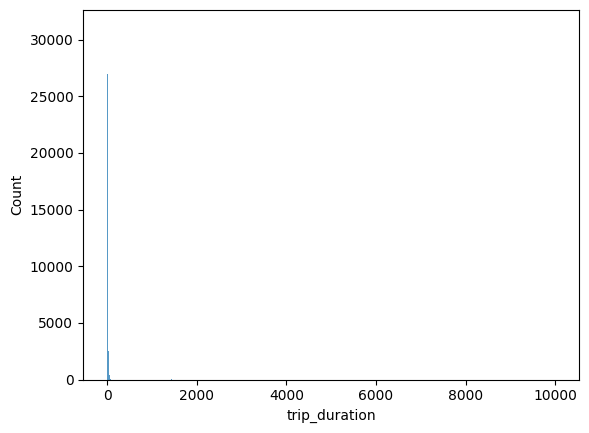

In [41]:
sns.histplot(ny_data_january['trip_duration'])

In [48]:
desc = ny_data_january.trip_duration.describe(percentiles=[0.95, 0.98, 0.99])
desc.round(3)

count    3066766.000
mean          15.669
std           42.594
min          -29.200
50%           11.517
95%           36.467
98%           48.733
99%           57.250
max        10029.183
Name: trip_duration, dtype: float64

In [49]:
((ny_data_january.trip_duration >= 1) & (ny_data_january.trip_duration <= 60)).mean()

0.9812202822125979

In [52]:
ny_data_january_trip_duration_subset = ny_data_january[(ny_data_january.trip_duration >= 1) & (ny_data_january.trip_duration <= 60)]
ny_data_january_trip_duration_subset

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [57]:
categorical = ['pulocationid', 'dolocationid']
numerical = ['trip_distance']

ny_data_january_trip_duration_subset[categorical] = ny_data_january_trip_duration_subset[categorical].astype(str)
ny_data_january_trip_duration_subset[categorical].dtypes


/var/folders/cl/llngymcd5fx7ncy9lm0nnzmw0000gn/T/ipykernel_13896/912051059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data_january_trip_duration_subset[categorical] = ny_data_january_trip_duration_subset[categorical].astype(str)


pulocationid    object
dolocationid    object
dtype: object

In [59]:
train_dict = ny_data_january_trip_duration_subset[categorical + numerical].to_dict(orient='records')

In [62]:
# Applying a one hot encoder to the categorical variables.
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)


In [63]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [66]:
target = 'trip_duration'
y_train = ny_data_january_trip_duration_subset[target].values
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(X_train)

/var/folders/cl/llngymcd5fx7ncy9lm0nnzmw0000gn/T/ipykernel_13896/1877227026.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Prediction')
/var/folders/cl/llngymcd5fx7ncy9lm0nnzmw0000gn/T/ipykernel_13896/1877227026.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

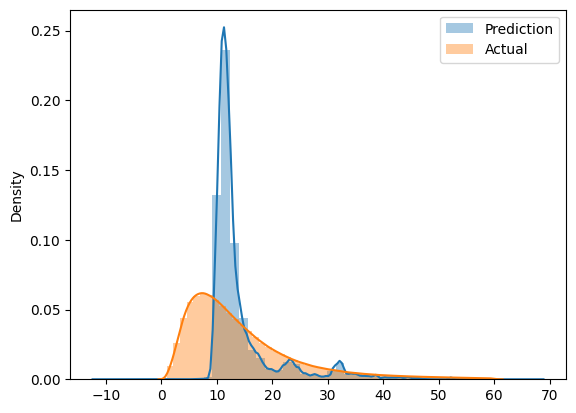

In [71]:
sns.distplot(y_pred, label='Prediction')
sns.distplot(y_train, label='Actual')

plt.legend()

In [74]:
mean_squared_error(y_train, y_pred, squared=False)

/Users/camilo/Documents/mlops_2024/mlops_2024/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.658396898909143

In [ ]:
lasso_reg = LassoRegression()